In [21]:
import os
import cv2
from pathlib import Path
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Set default color map and interpolation method for images.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

%matplotlib inline

In [3]:
def display(figsize, images):
    """
    Display one or more images in a single figure.

    Parameters:
        - figsize: Size of the figure with (width, height).
        - images: List of tuples with (image, title, position).

    """
    plt.figure(figsize=figsize)

    for image, title, position in images:

        # Create titled subplot at given position.
        plt.subplot(*position if isinstance(position, tuple) else [position])
        plt.title(title)

        # Disable axis when only showing images.
        plt.axis('off')

        # Render image into current subplot.
        plt.imshow(image)

    # Display the figure.
    plt.show()

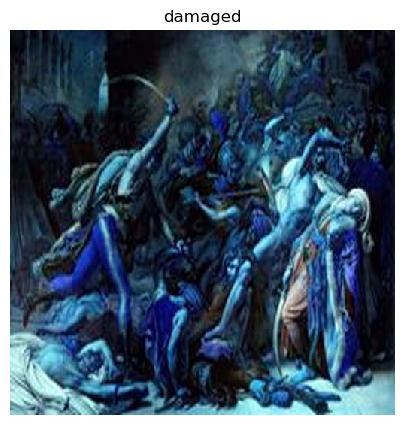

In [7]:
# data
sample_image_path = r"C:\Users\larao\OneDrive\Desktop\Master\WiSe2425\DLCV\Projekt\ArtRestoration\realistic_paintings\realistic_paintings\initial\0.jpg"

cracked_image = cv2.imread(sample_image_path, cv2.IMREAD_COLOR)
#cracked_image = cv2.cvtColor(cracked_image, cv2.COLOR_BGR2RGB)


# load images and render them into a figure
display((15,5), [
   (cracked_image, "damaged", 111),
])

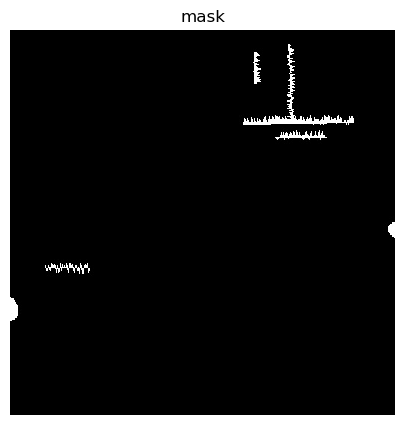

In [6]:
sample_crack_mask_path = r"C:\Users\larao\OneDrive\Desktop\Master\WiSe2425\DLCV\Projekt\ArtRestoration\realistic_paintings\realistic_paintings\crack_mask\0.jpg"

cracked_mask = cv2.imread(sample_crack_mask_path, cv2.IMREAD_GRAYSCALE)
#cracked_image = cv2.cvtColor(cracked_image, cv2.COLOR_BGR2RGB)


# load images and render them into a figure
display((15,5), [
   (cracked_mask, "mask", 111),
])

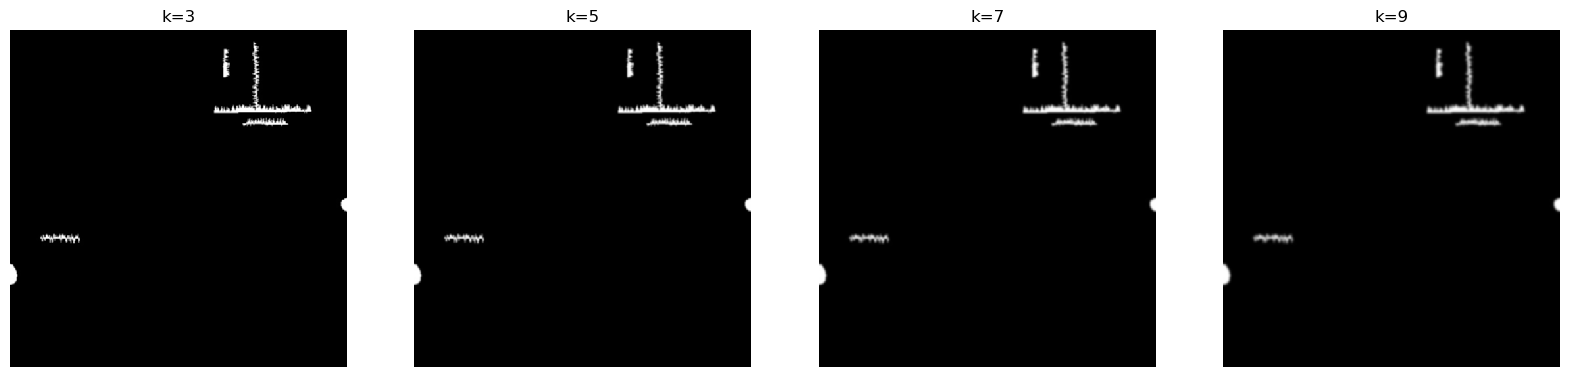

In [31]:
gaus_3 = cv2.GaussianBlur(cracked_mask, (3,3), 0)
gaus_5 = cv2.GaussianBlur(cracked_mask, (5,5), 0)
gaus_7 = cv2.GaussianBlur(cracked_mask, (7,7), 0)
gaus_9 = cv2.GaussianBlur(cracked_mask, (9,9), 0)



display((20,5), [
   (gaus_3, "k=3", 141),
   (gaus_5, "k=5", 142),
   (gaus_7, "k=7", 143),
   (gaus_9, "k=9", 144)
])

In [32]:
gaus_3_stacked = np.dstack([gaus_3, gaus_3, gaus_3])
gaus_3_stacked.shape

(512, 512, 3)

In [34]:
# overlay
colors = [(0,0,0),(255,255,255)]
color = colors[np.random.randint(len(colors))]
transformed_img1 = np.where(gaus_3_stacked>0, color, cracked_image)

In [46]:
((gaus_3_stacked/255)*cracked_image).max()

255.0

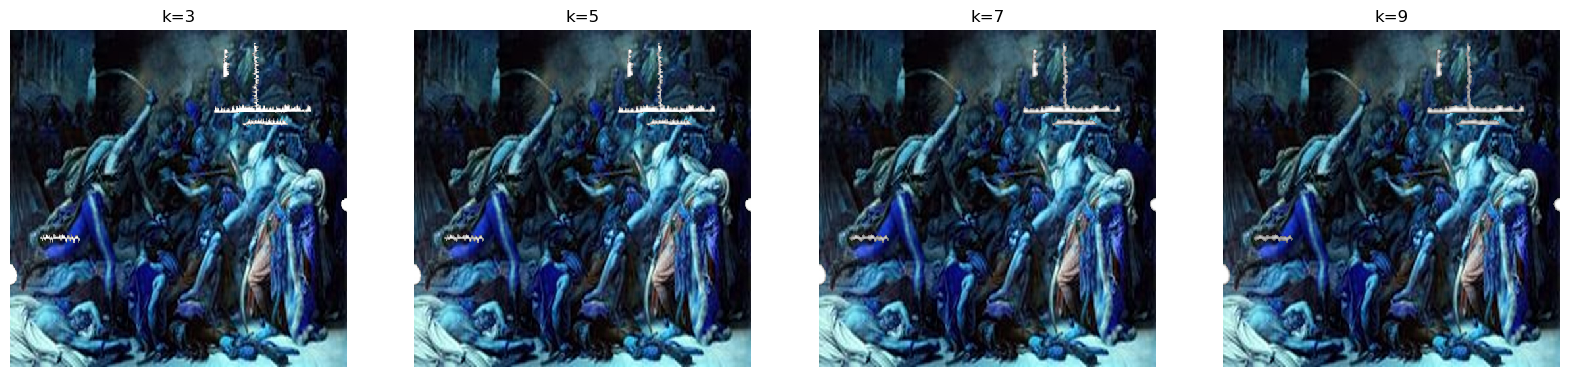

In [49]:
#stack 
gaus_3_stacked = np.dstack([gaus_3, gaus_3, gaus_3])
gaus_5_stacked = np.dstack([gaus_5, gaus_5, gaus_5])
gaus_7_stacked = np.dstack([gaus_7, gaus_7, gaus_7])
gaus_9_stacked = np.dstack([gaus_9, gaus_9, gaus_9])

# all have the same color to make it 100% comparable
colors = [(0,0,0),(255,255,255)]
color = colors[np.random.randint(len(colors))]

transformed_img1 = np.where(gaus_3_stacked>90, gaus_3_stacked, cracked_image)
transformed_img2 = np.where(gaus_5_stacked>90, gaus_5_stacked, cracked_image)
transformed_img3 = np.where(gaus_7_stacked>90, gaus_7_stacked, cracked_image)
transformed_img4 = np.where(gaus_9_stacked>90, gaus_9_stacked, cracked_image)

display((20,5), [
   (transformed_img1, "k=3", 141),
   (transformed_img2, "k=5", 142),
   (transformed_img3, "k=7", 143),
   (transformed_img4, "k=9", 144)
])

In [50]:
cv2.imwrite("gaus_3.jpg", transformed_img1)
cv2.imwrite("gaus_5.jpg", transformed_img2)
cv2.imwrite("gaus_7.jpg", transformed_img3)
cv2.imwrite("gaus_9.jpg", transformed_img4)

True

In [ ]:
MASK_DIR = r"C:\Users\larao\OneDrive\Desktop\Master\WiSe2425\DLCV\Projekt\ArtRestoration\realistic_paintings\realistic_paintings\crack_mask"
IMG_DIR = r"C:\Users\larao\OneDrive\Desktop\Master\WiSe2425\DLCV\Projekt\ArtRestoration\realistic_paintings\realistic_paintings\initial"

for k in [3, 5, 7, 9]:
    # create paths to new directories
    new_mask_dir = Path(MASK_DIR+f"_b{k}")
    new_damage_dir = Path(r"C:\Users\larao\OneDrive\Desktop\Master\WiSe2425\DLCV\Projekt\ArtRestoration\realistic_paintings\realistic_paintings\damaged_paintings_b"+f"{k}")
    
    # iterate over all files
    files = [f for f in os.listdir(MASK_DIR) if f.endswith('jpg')]
    for file in files:
        path = os.path.join(MASK_DIR, file)
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        path = os.path.join(IMG_DIR, file)
        image = cv2.imread(path, cv2.IMREAD_COLOR)

        # blur the mask 
        blurred_mask = cv2.GaussianBlur(mask, (k,k), 0)

        # stack the mask
        stacked_mask = np.dstack([blurred_mask, blurred_mask, blurred_mask])
        
        # replace values in image with mask
        transformed_image = np.where(stacked_mask>90, stacked_mask, image)

        # make new directory
        new_damage_dir.mkdir(exist_ok=True)
        cv2.imwrite(os.path.join(new_damage_dir, file), transformed_image)

        new_mask_dir.mkdir(exist_ok=True)
        cv2.imwrite(os.path.join(new_mask_dir, file), blurred_mask)

: 